In [1]:
!ls /kaggle/input/da-dog-cat

data_dog_cat


In [2]:
import glob
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, Reshape
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.regularizers import l2

In [3]:
path_cats_test = '/kaggle/input/da-dog-cat/data_dog_cat/test_set/cats/*'
path_dogs_test = '/kaggle/input/da-dog-cat/data_dog_cat/test_set/dogs/*'
path_cats_training = '/kaggle/input/da-dog-cat/data_dog_cat/training_set/cats/*'
path_dogs_training = '/kaggle/input/da-dog-cat/data_dog_cat/training_set/dogs/*'

In [4]:
size = 200
x_test, y_test = [], []
x_train, y_train = [], []
x_val, y_val = [], []

for path in glob.glob(path_cats_test):
    a = cv2.imread(path)
    a = cv2.resize(a, (size, size))
    x_test.append(a)
    y_test.append(0)
for path in glob.glob(path_dogs_test):
    a = cv2.imread(path)
    a = cv2.resize(a, (size, size))
    x_test.append(a)
    y_test.append(1)
for path in glob.glob(path_cats_training):
    a = cv2.imread(path)
    a = cv2.resize(a, (size, size))
    x_train.append(a)
    y_train.append(0)
for path in glob.glob(path_dogs_training):
    a = cv2.imread(path)
    a = cv2.resize(a, (size, size))
    x_train.append(a)
    y_train.append(1)

In [5]:
x_train = np.array(x_train, dtype = 'float32')
x_test = np.array(x_test, dtype = 'float32')

y_train = np.array(y_train, dtype = 'int32')
y_test = np.array(y_test, dtype = 'int32')

In [6]:
# Chuẩn hóa giá trị pixel về khoảng [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

In [7]:
# data = [1,2,3,4,5,6,7,8,9,0]
# data2 = [1,2,3,4,5,6,7,8,9,0]
# data3=[]
# data4=[]
# data5=[]
# data6=[]

# data3,data4,data5,data6 = train_test_split(data, data2, test_size=0.2, random_state=4)
# print(data3)
# print(data5)

In [8]:
from sklearn.model_selection import train_test_split
x_train_scale, x_val, y_train_scale, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=4)
print(x_train_scale.shape, x_val.shape)

(6399, 200, 200, 3) (1600, 200, 200, 3)


In [9]:
print(y_train_scale)

[0 1 0 ... 0 0 0]


In [10]:
#CNN
inp = Input(shape=(200, 200, 3))
cnn = Conv2D(filters=32, kernel_size=3, activation='relu')(inp)
pooling = MaxPooling2D(pool_size=(2, 2))(cnn)
drop = Dropout(0.2)(pooling)

cnn = Conv2D(filters=64, kernel_size=3, activation='relu')(drop)
pooling = MaxPooling2D(pool_size=(2, 2))(cnn)
drop = Dropout(0.3)(pooling)

cnn = Conv2D(filters=128, kernel_size=3, activation='relu')(drop)
pooling = MaxPooling2D(pool_size=(2, 2))(cnn)
drop = Dropout(0.4)(pooling)

f = Flatten()(drop)

fc1 = Dense(units=128, activation='relu')(f)
fc1 = Dropout(0.5)(fc1)

out = Dense(units=1, activation='sigmoid')(fc1)


model = Model(inputs = inp, outputs = out)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 99, 99, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 99, 99, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 48, 48, 64)        0         
 g2D)                                                        

In [11]:
optimizer1 = tensorflow.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer1, loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train_scale, y_train_scale, batch_size=64, epochs=30, validation_data=(x_val, y_val))

Epoch 1/30
100/100 [==============================] - 284s 3s/step - loss: 0.7415 - accuracy: 0.5374 - val_loss: 0.6495 - val_accuracy: 0.6156
Epoch 2/30
100/100 [==============================] - 283s 3s/step - loss: 0.6489 - accuracy: 0.6060 - val_loss: 0.6232 - val_accuracy: 0.6275
Epoch 3/30
100/100 [==============================] - 281s 3s/step - loss: 0.6241 - accuracy: 0.6429 - val_loss: 0.5974 - val_accuracy: 0.6619
Epoch 4/30
100/100 [==============================] - 280s 3s/step - loss: 0.5942 - accuracy: 0.6815 - val_loss: 0.5876 - val_accuracy: 0.6725
Epoch 5/30
100/100 [==============================] - 281s 3s/step - loss: 0.5544 - accuracy: 0.7173 - val_loss: 0.5603 - val_accuracy: 0.7225
Epoch 6/30
100/100 [==============================] - 283s 3s/step - loss: 0.5156 - accuracy: 0.7428 - val_loss: 0.5538 - val_accuracy: 0.7038
Epoch 7/30
100/100 [==============================] - 280s 3s/step - loss: 0.4643 - accuracy: 0.7778 - val_loss: 0.5235 - val_accuracy: 0.7450

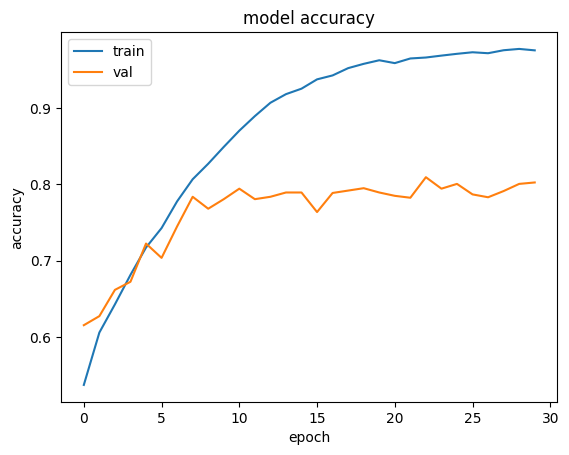

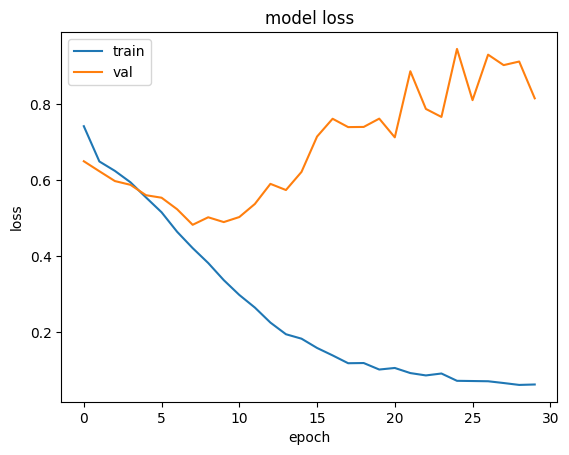

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'],loc = 'upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'],loc='upper left')
plt.show()

In [13]:
model.save('model2.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [15]:
y_guess = model.predict(x_test)

63/63 [==============================] - 42s 664ms/step


In [16]:
def predict(y_guess):
    for i in range(len(y_guess)):
        y_guess[i] = 0 if y_guess[i] < 0.5 else 1
    return y_guess

In [17]:
y_pre = predict(y_guess)

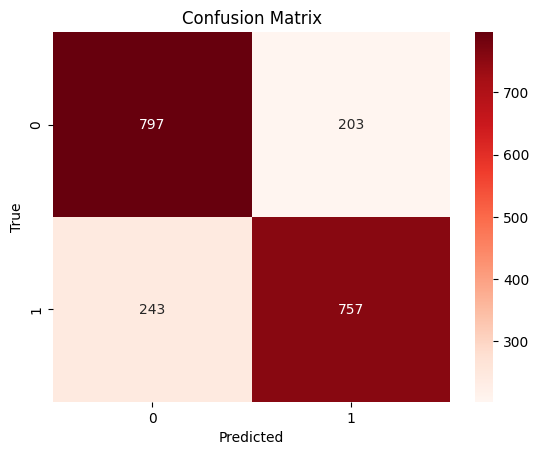

In [18]:
import sklearn
import seaborn as sns


# Tạo confusion matrix
cm = sklearn.metrics.confusion_matrix(y_test, y_pre)

# Vẽ confusion matrix
plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pre)
precision = precision_score(y_test, y_pre)
recall = recall_score(y_test, y_pre)
f1 =f1_score(y_test, y_pre)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.78
Precision: 0.79
Recall: 0.76
F1 Score: 0.77
